**Objective**: Investigate the reservoir activity.

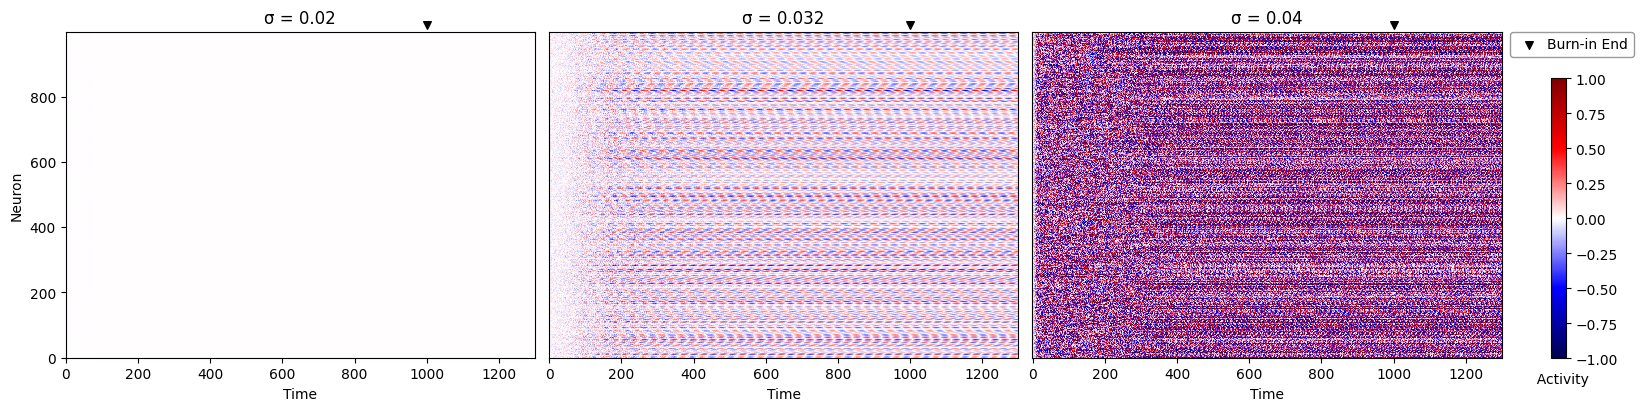

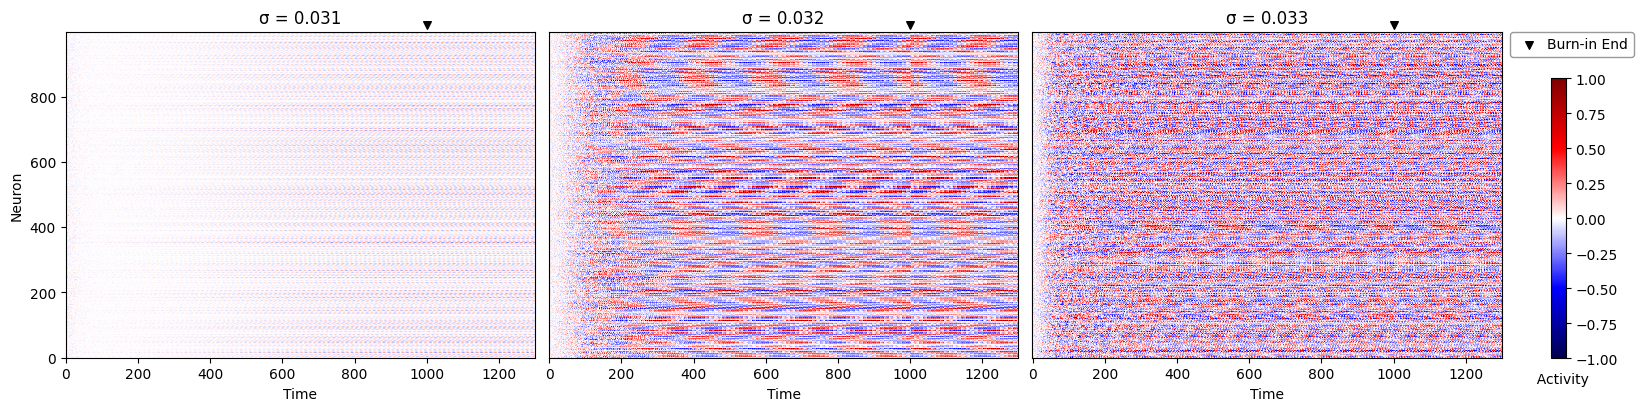

In [111]:
import os
os.chdir(os.path.join(os.getcwd(), "../code"))
import numpy as np
import matplotlib.pyplot as plt
from agent import Reservoir
from config import DATA_PATH
from pathlib import Path

folder = 'reservoirs'
path = Path(DATA_PATH) / folder
path.mkdir(parents=True, exist_ok=True)

TIME_STEPS = 300
BURN_IN_END = 1000
MEAN = 0
NUM_NEURONS = 1000

sigma_range_wide = [0.02, 0.032, 0.04]
sigma_range_narrow = [0.031, 0.032, 0.033]

def make_plot(sigma_range):
    """
    Creates 3 plots for the network activity.
    """
    num_columns = len(sigma_range)

    if num_columns != 3:
        raise UserWarning('Layout may not fit for more or less than 3 plots.')

    fig, axes = plt.subplots(1, num_columns, figsize=(5*num_columns, 4), constrained_layout=True)
    axes = axes.flatten() if len(sigma_range) > 1 else [axes]

    for i, sigma in enumerate(sigma_range):
        reservoir = Reservoir(time_steps=TIME_STEPS, num_neurons=NUM_NEURONS, burn_in_time=BURN_IN_END, mean=MEAN, standard_deviation=sigma)
        
        ax = axes[i]
        activity = np.concatenate((reservoir.burn_in_state_matrix, reservoir.neuron_state_time_matrix), axis=0)
        im = ax.imshow(activity.T, cmap='seismic', aspect='auto', interpolation='nearest', vmin=-1, vmax=1)
        
        if i == 0:
            ax.set_ylabel('Neuron')
        else:
            ax.tick_params(left=False, labelleft=False)

        ax.set_xlabel('Time')
        ax.set_title(f'σ = {sigma}')
        
        burn_in_end = reservoir.burn_in_state_matrix.shape[0]
        label = 'Burn-in End' if i == 0 else None
        ax.scatter(burn_in_end, activity.shape[1] - 0.5 + 20, marker='v', s=30, color='black', zorder=10, clip_on=False, label=label)
        ax.set_ylim(-0.5, activity.shape[1] - 0.5)

    cbar_ax = fig.add_axes([1.03, 0.117, 0.01, 0.7])  # [left, bottom, width, height]
    cbar = fig.colorbar(im, cax=cbar_ax)
    cbar.ax.set_xlabel('  Activity', labelpad=10)

    fig.legend(loc='upper right', bbox_to_anchor=(1.09, 0.95), handletextpad=0.3, edgecolor=(0.5, 0.5, 0.5))

    save_path = Path(DATA_PATH) / folder / 'reservoir_activities'
    save_path.mkdir(parents=True, exist_ok=True)
    plt.savefig(save_path / 'combined_reservoirs.svg', format='svg', bbox_inches='tight')

    plt.show()

make_plot(sigma_range_wide)
make_plot(sigma_range_narrow)